# Exploratory Data Analysis (EDA)

This notebook explores financial performance and customer behavior using cleaned datasets.
The goal is to uncover trends, growth patterns, and key business insights.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [2]:
financials = pd.read_csv('../data/processed/clean_financials.csv')
customers = pd.read_csv('../data/processed/clean_customers.csv')

financials.head(), customers.head()


(         date  revenue  expenses  profit  profit_margin    month
 0  2023-01-01   120000     85000   35000       0.291667  2023-01
 1  2023-02-01   125000     87000   38000       0.304000  2023-02
 2  2023-03-01   130000     90000   40000       0.307692  2023-03
 3  2023-04-01   145000     98000   47000       0.324138  2023-04
 4  2023-05-01   150000    105000   45000       0.300000  2023-05,
   customer_id transaction_date subscription_tier  amount  churned    month
 0        C001       2023-01-15             Basic      20        0  2023-01
 1        C002       2023-01-20           Premium      50        0  2023-01
 2        C003       2023-02-10             Basic      20        1  2023-02
 3        C004       2023-02-18        Enterprise     120        0  2023-02
 4        C005       2023-03-05           Premium      50        0  2023-03)

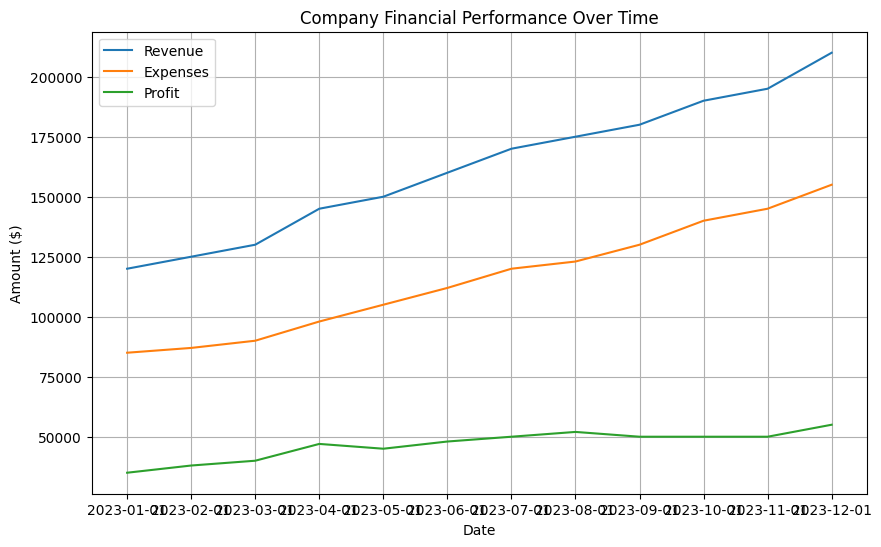

In [3]:
plt.figure(figsize=(10,6))
plt.plot(financials['date'], financials['revenue'], label='Revenue')
plt.plot(financials['date'], financials['expenses'], label='Expenses')
plt.plot(financials['date'], financials['profit'], label='Profit')

plt.title('Company Financial Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
financials['revenue_growth_pct'] = financials['revenue'].pct_change() * 100

financials[['date', 'revenue', 'revenue_growth_pct']]


,date,revenue,revenue_growth_pct
0,2023-01-01,120000,NaN
1,2023-02-01,125000,4.166667
2,2023-03-01,130000,4.000000
3,2023-04-01,145000,11.538462
4,2023-05-01,150000,3.448276
5,2023-06-01,160000,6.666667
6,2023-07-01,170000,6.250000
7,2023-08-01,175000,2.941176
8,2023-09-01,180000,2.857143
9,2023-10-01,190000,5.555556


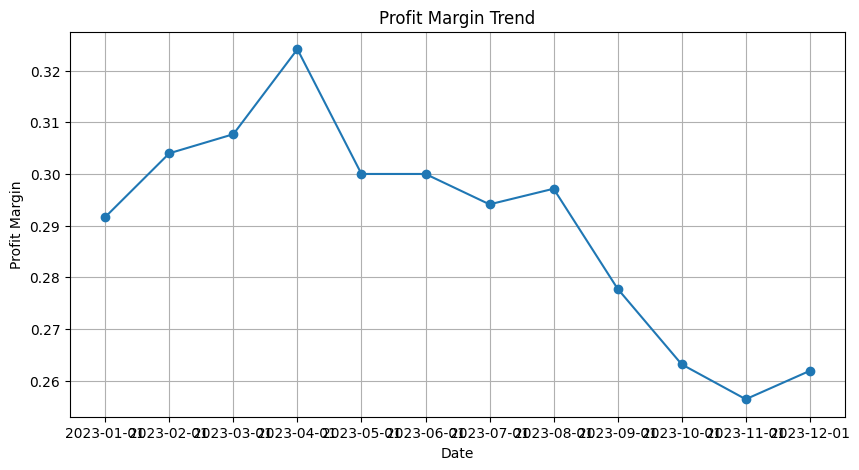

In [5]:
plt.figure(figsize=(10,5))
plt.plot(financials['date'], financials['profit_margin'], marker='o')

plt.title('Profit Margin Trend')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.show()


In [6]:
revenue_by_tier = customers.groupby('subscription_tier')['amount'].sum()

revenue_by_tier


subscription_tier
Basic          80
Enterprise    240
Premium       200
Name: amount, dtype: int64

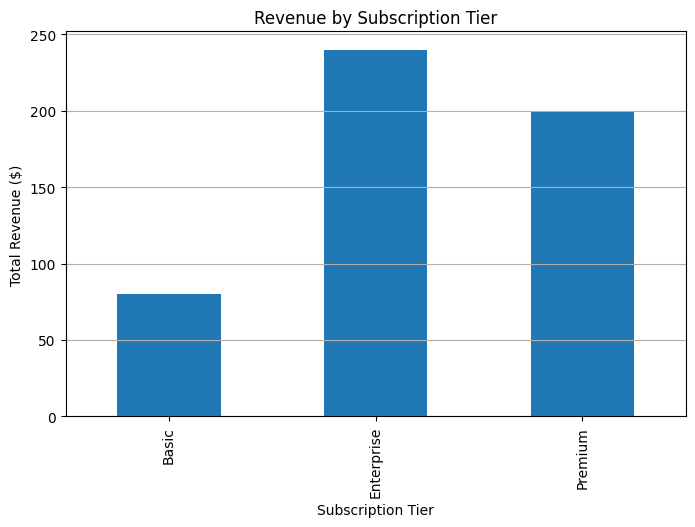

In [7]:
revenue_by_tier.plot(kind='bar', figsize=(8,5))

plt.title('Revenue by Subscription Tier')
plt.xlabel('Subscription Tier')
plt.ylabel('Total Revenue ($)')
plt.grid(axis='y')
plt.show()


In [8]:
churn_rate = customers.groupby('subscription_tier')['churned'].mean() * 100
churn_rate


subscription_tier
Basic         75.0
Enterprise     0.0
Premium        0.0
Name: churned, dtype: float64

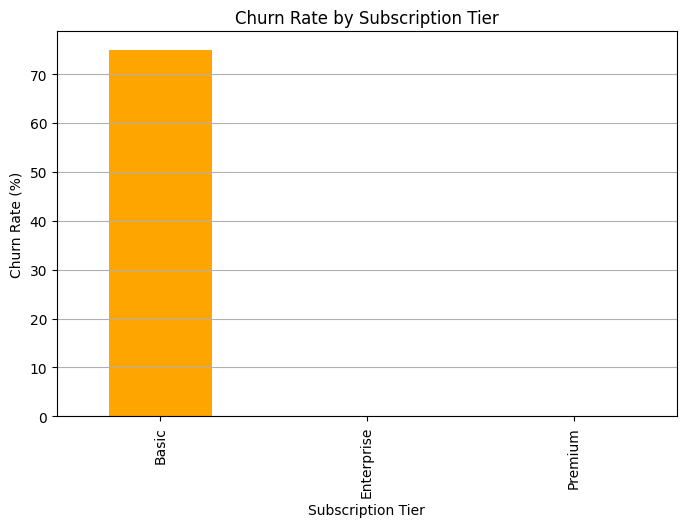

In [9]:
churn_rate.plot(kind='bar', figsize=(8,5), color='orange')

plt.title('Churn Rate by Subscription Tier')
plt.xlabel('Subscription Tier')
plt.ylabel('Churn Rate (%)')
plt.grid(axis='y')
plt.show()


## Key Insights

- Revenue shows a consistent upward trend, indicating healthy business growth.
- Profit margins improved over time, suggesting better cost management.
- Premium and Enterprise tiers generate the majority of revenue.
- Basic tier exhibits higher churn, highlighting a potential retention risk.

These insights can inform pricing strategy, customer retention efforts, and financial forecasting.
